**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

# 4. GMM(Gaussian Mixture Model)

GMM은 데이터가 여러 개의 정규 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행한다.

GMM은 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 그 중 어떤 정규 분포에 속하는지 결정한다.

이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정한다.

- 개별 정규 분포의 평균과 분산


- 각 데이터가 어떤 정규 분포에 해당되는지의 확률

모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다.

## 4.1 IRIS 데이터

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns = feature_names)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# target, gmm_cluster 비교
iris_df["gmm_cluster"] = gmm_cluster_labels

iris_df.groupby(["target","gmm_cluster"]).size()

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
dtype: int64

- GMM은 `sklearn.mixture()`의 `GaussianMixture()`로 수행 가능하다.


- n_components는 모델의 총 개수로 K-Means의 n_clusters와 마찬가지로 군집의 개수를 정한다.


- 여기서 gmm_cluster는 target이 1인 경우, 5개만 다르게 매핑되고 나머지는 모두 잘 매핑되었다.

## 4.2 GMM/K-Means

**군집분석 시각화 함수**

In [5]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

- clusterobj: `fit()`과 `predict()`로 군집 완료된 사이킷런 객체, 혹은 가상데이터 시각화면 None


- dataframe: 피처와 target을 가진 데이터 프레임, 군집분석 시각화면 군집 label을 포함


- label_name: dataframe 내의 군집 label, 혹은 가상데이터 target


- iscenter: 군집 분석 객체의 군집 중심 좌표 제공 여부

### 4.2.1 K-Means

**가상데이터(원형)**

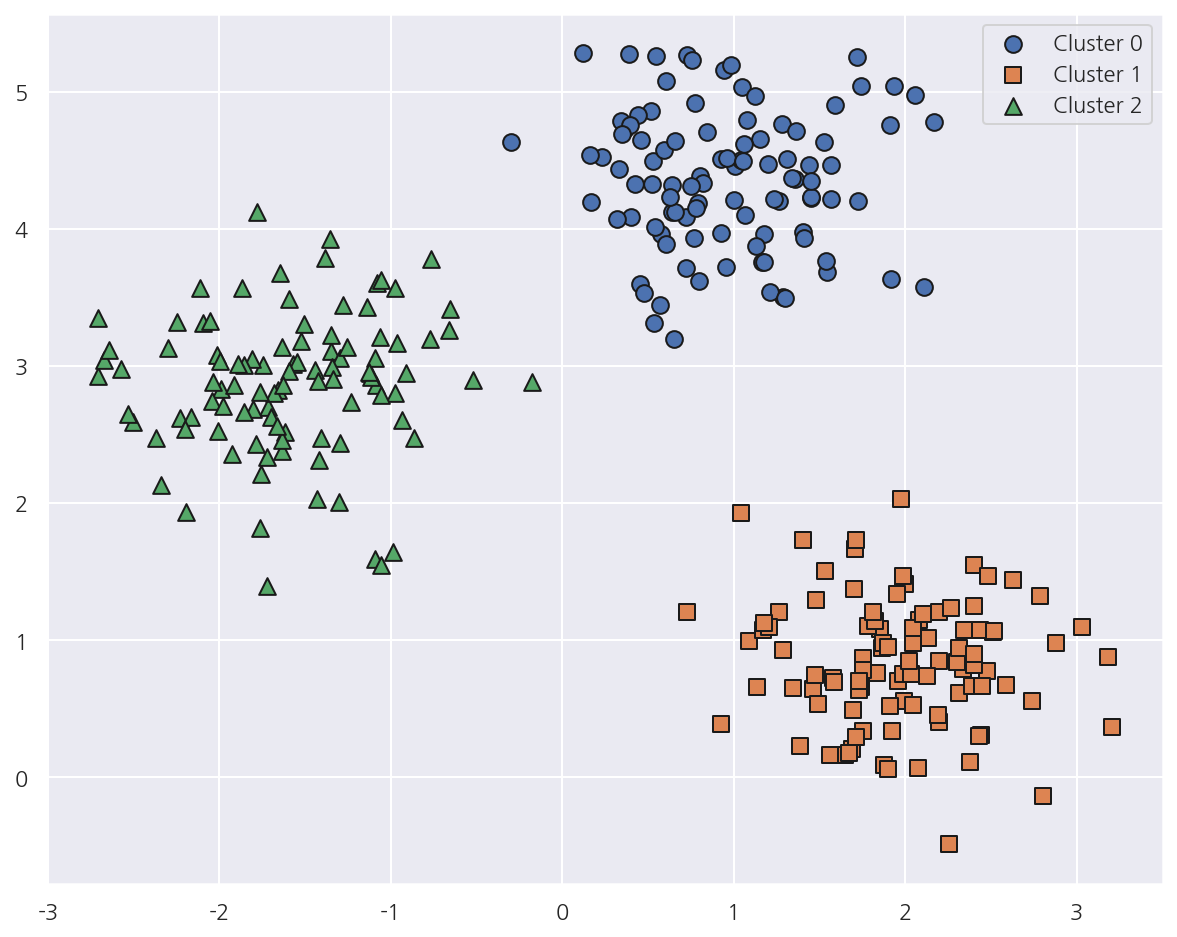

In [6]:
from sklearn.datasets import make_blobs

# 가상데이터
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 데이터 프레임
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

- 가상데이터의 cluster_std를 0.5로 작게 설정해 군집 내 데이터를 뭉치게 하였다.

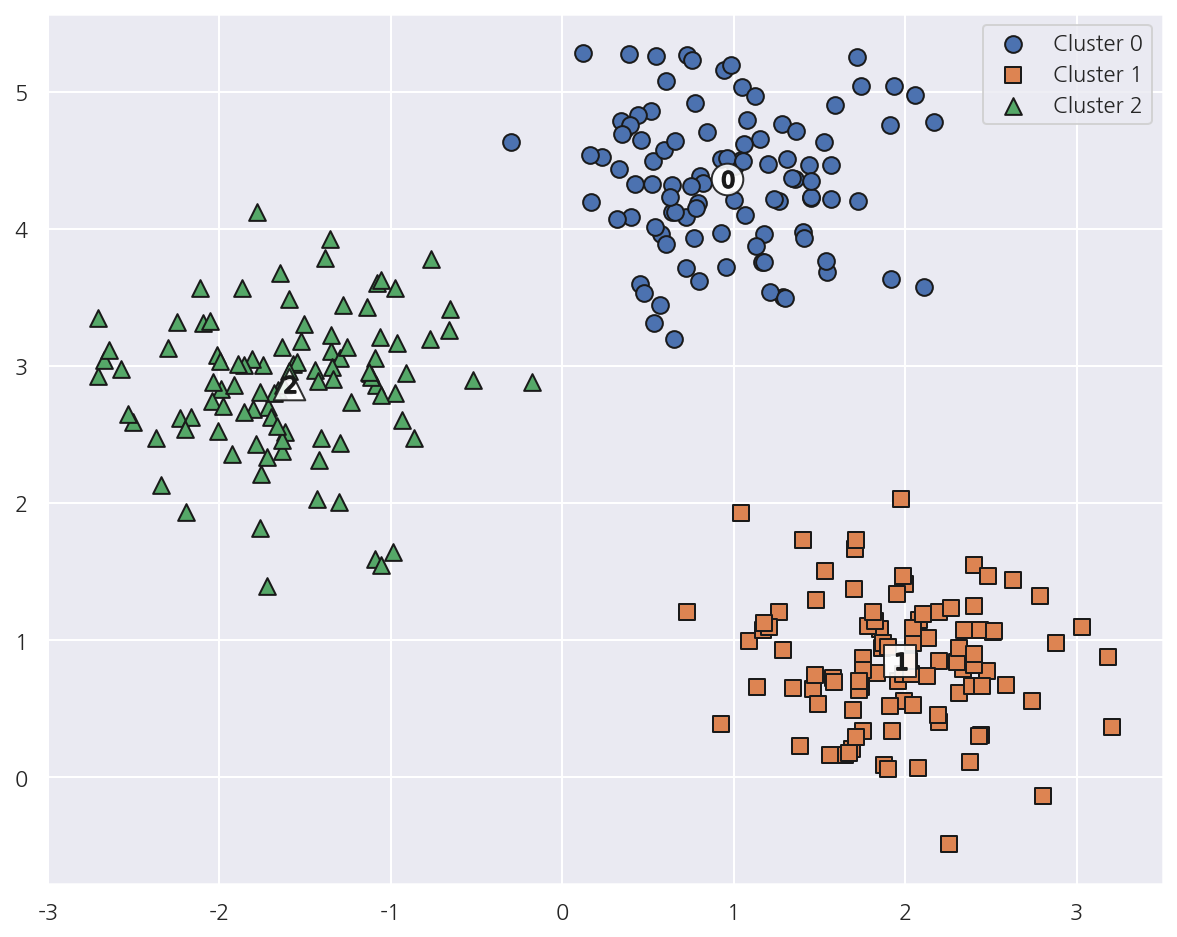

In [7]:
from sklearn.cluster import KMeans

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans_label = kmeans.fit_predict(X)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

- K-Means는 개별 군집의 중심에서 원형의 범위에서 군집화를 수행하므로 위 데이터의 경우 군집화 효율이 높아진다.


- 앞서 가상데이터의 target에 맞게 시각화 한 것과 거의 동일하게 매핑되었다.

**가상데이터(타원형)**

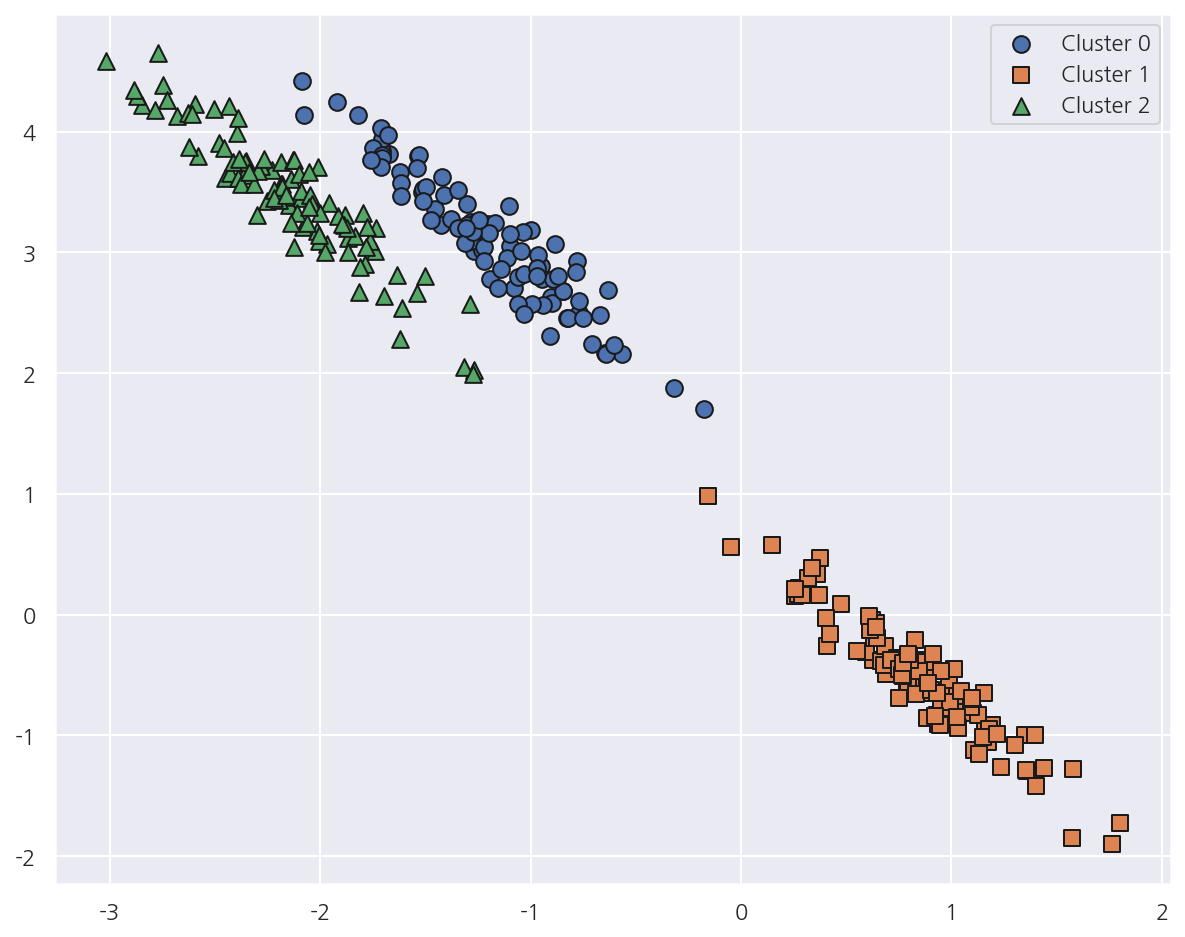

In [8]:
# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = X @ transformation

# 데이터 프레임
cluster_df = pd.DataFrame(X_aniso, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

- 이번엔 가상데이터를 살짝 변형에서 타원형의 데이터를 생성하였다.

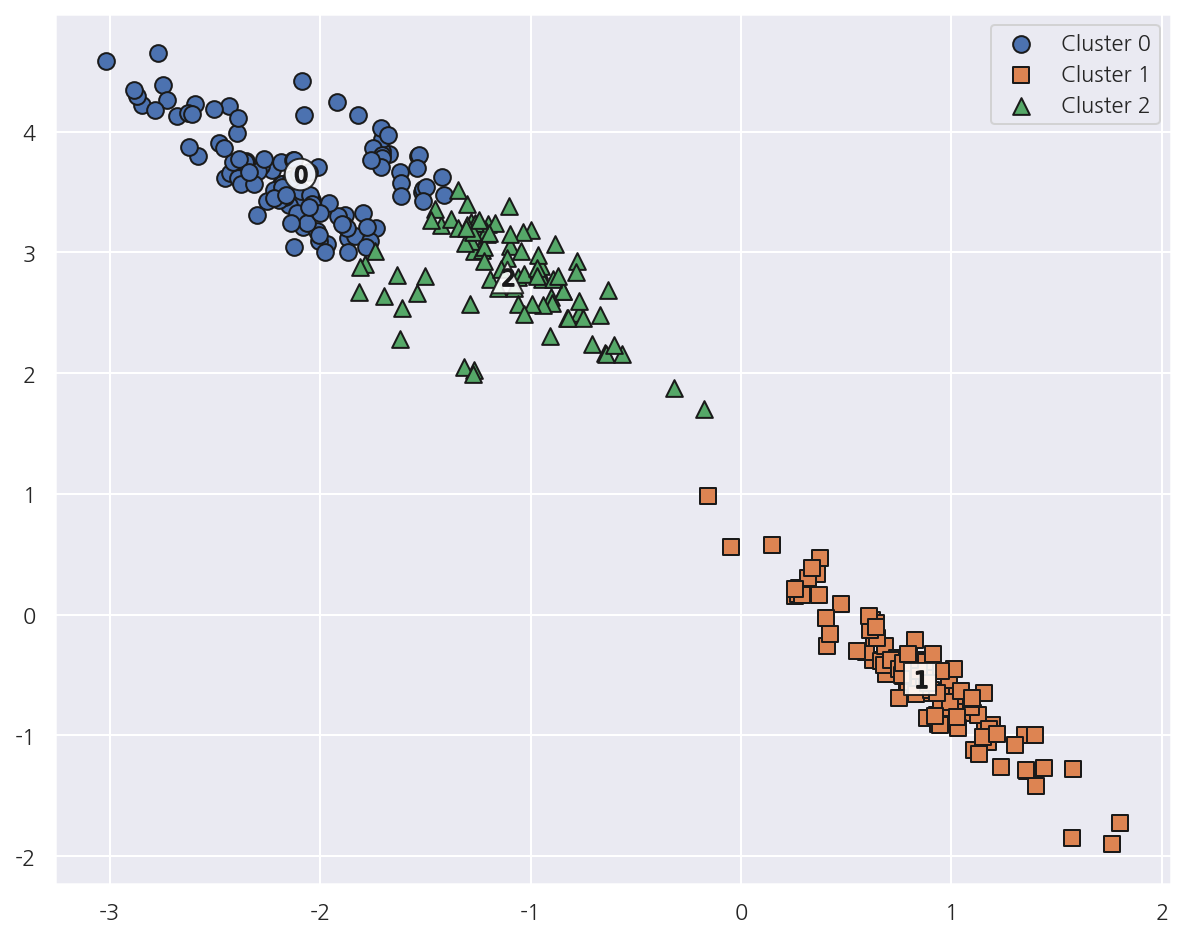

In [9]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

- 타원형의 가상데이터에 대해 K-Means 군집화가 잘 이루어지지 않았다.


- K-Means는 평균 거리 기반으로 군집화하므로 같은 거리상 원형으로 군집을 구성한다.


- 위와 같은 데이터에 대해선 최적의 군집화가 어렵다.

### 4.2.2 GMM

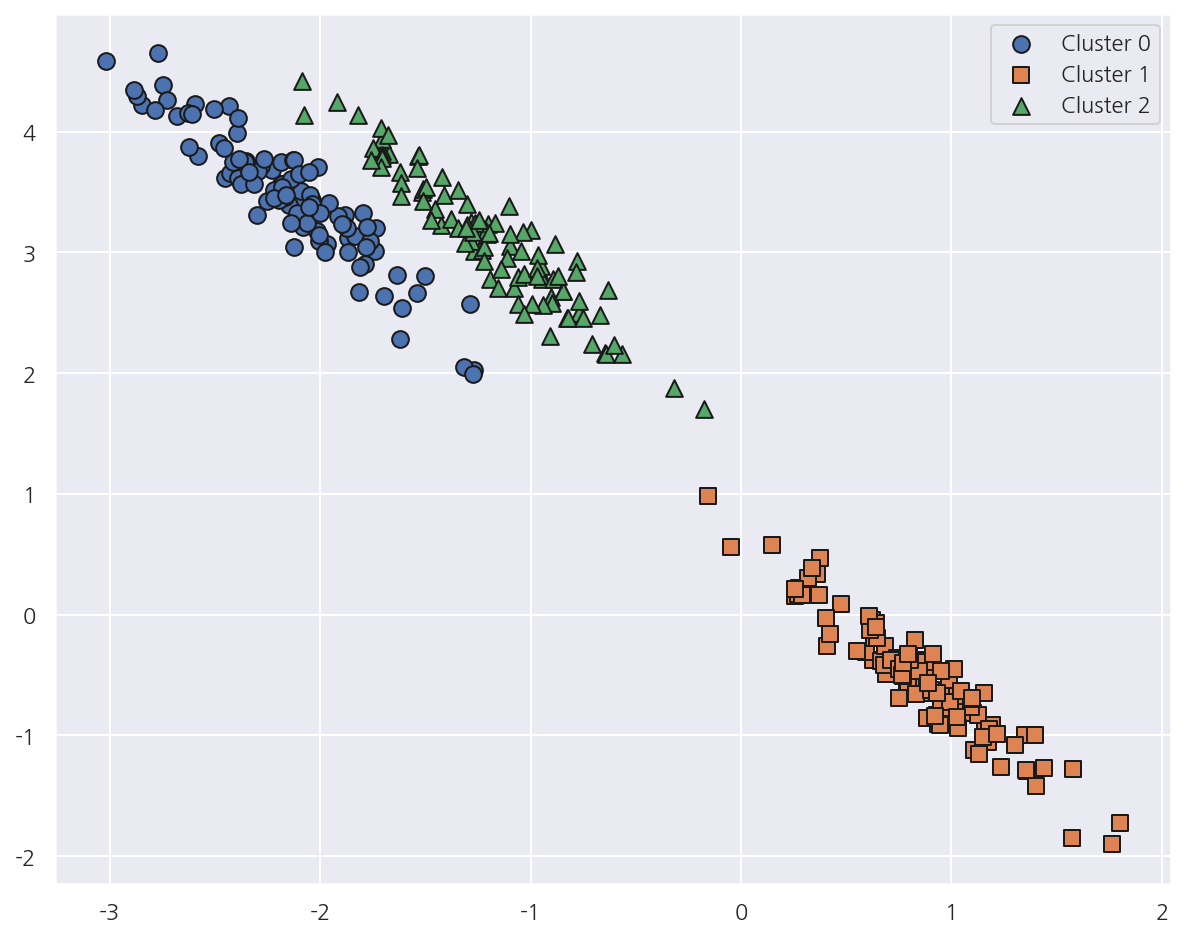

In [10]:
# GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["gmm_label"] = gmm_label

# GMM은 cluster_centers_ 속성이 없음
visualize_cluster_plot(gmm, cluster_df, 'gmm_label',iscenter=False)

- GMM을 적용하였을 때 데이터가 분포된 방향에 따라 정확하게 군집화되었다.


- 이처럼 GMM은 K-Means보다 유연하게 다양한 데이터에 잘 적용할 수 있다.


- 다만 군집화를 위한 수행 시간이 오래 걸린다.

In [11]:
print('### KMeans Clustering ###')
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

print('\n### Gaussian Mixture Clustering ###')
print(cluster_df.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- 매핑된 결과를 통해 확실히 GMM이 K-Means보다 잘 매핑되어 있음을 알 수 있다.